In [1]:
import sys
# sys.path.append('/home/abigaile-woodbury/Research/cp_reach')  # UPDATE path as needed
sys.path.append('/home/micah/Research/development/cp_reach')
import json
import numpy as np
import matplotlib.pyplot as plt
import cp_reach as cp

import cp_reach.satellite.invariant_set
import cp_reach.utils.plotting

In [2]:
# # Generate reference trajectory for satellite
# ref = sat_plan.orbit_trajectory()
# np.savez("ref_satellite.npz", **ref)

In [3]:
# # Load reference + define disturbances
# ref = dict(np.load("ref_satellite.npz"))
# satellite_config = {
#     'thrust_disturbance': 0.002,
#     'torque_disturbance': 0.0002,
#     'burn_time_disturbance': 0.0005
# }


In [2]:
ref = None

In [3]:
ang_vel_points,lower_bound_omega,upper_bound_omega,omega_dist,dynamics_sol,inv_points,lower_bound,upper_bound,kinematics_sol = cp_reach.satellite.invariant_set.solve(2, 2, ref)

In [4]:
print(lower_bound)
print(upper_bound)

[-2.27807401 -2.29837992 -1.89927842 -0.65665027 -0.66070462 -1.13107354]
[2.29598594 2.29837992 1.89930592 0.66025006 0.66070462 1.13107289]


In [11]:
def plot3DInvSet(points):
    plt.figure(figsize=(14,7))
    ax1 = plt.subplot(121, projection='3d', proj_type='ortho', elev=40, azim=20)
    ax1.plot3D(points[0, :], points[1, :], points[2, :],'g')
    ax1.set_xlabel('$\\theta_x$, rad')
    ax1.set_ylabel('$\\theta_y$, rad')
    ax1.set_zlabel('$\\theta_z$, rad', labelpad=1)
    ax1.set_title('Attitude Invariant Set', fontsize=20)

    plt.axis('auto')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
def plot2DInvSet(points):
    plt.figure(figsize=(14,7))
    ax1 = plt.subplot(121)
    ax1.plot(points[0, :], points[1, :],'g')
    ax1.set_xlabel('$\\theta_x$, rad')
    ax1.set_ylabel('$\\theta_y$, rad')
    ax1.set_title('Invariant Set in Lie Algebra', fontsize=20)

    plt.axis('auto')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

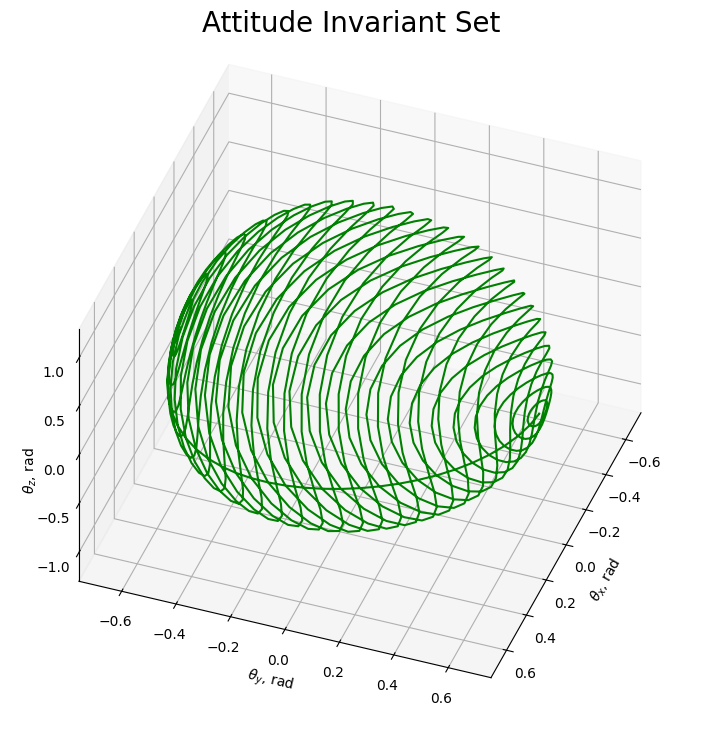

In [12]:
ypr = inv_points[3:6]
ypr.shape
plot3DInvSet(ypr)

In [4]:
# Run disturbance + Lyapunov-based reachability bounds
results = log_satellite.disturbance(satellite_config)

print("Inner Bound (SO3):", results['mu_inner'])
print("Outer Bound (SE3):", results['mu_outer'])
print("Omega Bound:", results['inner_bound'])


TypeError: disturbance() missing 1 required positional argument: 'ref'

In [ ]:
# Compute invariant points in SE(3)
points, theta = flowpipe.se23_invariant_set_points_theta(
    sol=results,
    N=20,
    w1=satellite_config['thrust_disturbance'],
    omegabound=results['inner_bound'],
    beta=results['outer_beta']
)
inv_points = flowpipe.exp_map(points, theta)


In [ ]:
# Plot invariant set
def plot2DInvSet(points, inv_points):
    plt.figure(figsize=(14, 7))
    plt.rcParams.update({'font.size': 12})

    ax1 = plt.subplot(121)
    ax1.plot(points[0, :], points[1, :], 'g')
    ax1.set_xlabel(r'$\zeta_x$ [km]')
    ax1.set_ylabel(r'$\zeta_y$ [km]')
    ax1.set_title('Lie Algebra (log map)')
    ax1.axis('equal')
    ax1.grid(True)

    ax2 = plt.subplot(122)
    ax2.plot(inv_points[0, :], inv_points[1, :], 'g')
    ax2.set_xlabel(r'$\eta_x$ [km]')
    ax2.set_ylabel(r'$\eta_y$ [km]')
    ax2.set_title('Lie Group (exp map)')
    ax2.axis('equal')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot2DInvSet(points, inv_points)


In [ ]:
# Generate flowpipes and plot
flowpipes_list, nominal_traj = flowpipe.flowpipes(
    ref=ref,
    step=1,
    w1=satellite_config['thrust_disturbance'],
    omegabound=1,
    sol=results,
    axis='xy'
)

flowpipe.plot_flowpipes(nominal_traj, flowpipes_list, axis='xy')


In [2]:
import os

base = '/home/abigaile-woodbury/Research/cp_reach/cp_reach'
print('__init__.py in cp_reach:', os.path.isfile(f'{base}/__init__.py'))
print('__init__.py in sim:', os.path.isfile(f'{base}/sim/__init__.py'))
print('__init__.py in satellite:', os.path.isfile(f'{base}/satellite/__init__.py'))
print('__init__.py in flowpipe:', os.path.isfile(f'{base}/flowpipe/__init__.py'))


__init__.py in cp_reach: True
__init__.py in sim: True
__init__.py in satellite: True
__init__.py in flowpipe: True
